
Implement the counting measure in Python. Test that it satisfies additivity on the disjoint sets
{"a", "b", "c"}, {"d", "e", "f"}.

In [87]:
#Implementation of the counting measure that checks if the input type is correct and raises an error otherwise
def count_measure(c):
  if not isinstance(c, set):
    raise ValueError("Input must be a set")
  return len(c)

#Testing the counting measure for additivity on disjoint sets :-

set1 = {"a", "b", "c"}
set2 = {"d", "e", "f"}
set1_measure = count_measure(set1)
set2_measure = count_measure(set2)
set_union = set1.union(set2)
union_measure = count_measure(set_union)

if set1_measure + set2_measure == union_measure:
  print("count of set1: {} and set2: {} and counting measure satisfies additivity on the disjoint sets which is {}".format(set1_measure, set2_measure, union_measure))
else:
  print("The counting measure doesn't satisfy additivity on disjoint sets")


count of set1: 3 and set2: 3 and counting measure satisfies additivity on the disjoint sets which is 6


Create a Python class which implements intervals. Use this new data type to write a function
which implements the length measure on intervals. Test it on the interval [1, 3.5].


In [88]:
#Creating a class which implements intervals
class Interval:
  def __init__(self, start, end):
    if not isinstance(start, (int, float)) or not isinstance(end, (int, float)):
      raise ValueError("Interval endpoints must be numeric values")
    self.start = start
    self.end = end

  def length(self):
    return (self.end - self.start)
#Testing the length measure function on the interval [1, 3.5]
def length_measure(interval):
  if not isinstance(interval, Interval):
    raise ValueError("Input must be an instance of the Interval class")
  return interval.length()

interval = Interval(1, 3.5)
interval_length = length_measure(interval)

print(f"The length of the interval [{interval.start}, {interval.end}] is {interval_length:.4f}")



The length of the interval [1, 3.5] is 2.5000


Import scipy.stats in order to access the scipy.stats.expon distribution. This implements the exponential distribution Exp(λ). Make sure you read the documentation https://docs.scipy.
org/doc/scipy/reference/generated/scipy.stats.expon.html to understand how it works and how
the parameter λ is encoded. Using the cdf method of scipy.stats.expon define a function called
expon_measure which will take as input an interval (defined in the previous question) and will return
its probability mass under the probability measure Exp (2) (i.e. λ = 2). Test your function by computing
the probability measure of the following intervals:
(a) [0, 1]
(b) [1, 1]
(c) [1, 10]
(d) [0, ∞)
Plot the pdf of Exp (2) on comment on whether your answers seem to make sense visually


Probability mass for interval (0, 1): 0.8647
Probability mass for interval (1, 1): 0.0000
Probability mass for interval (1, 10): 0.1353
Probability mass for interval (0, inf): 1.0000


<function matplotlib.pyplot.show(close=None, block=None)>

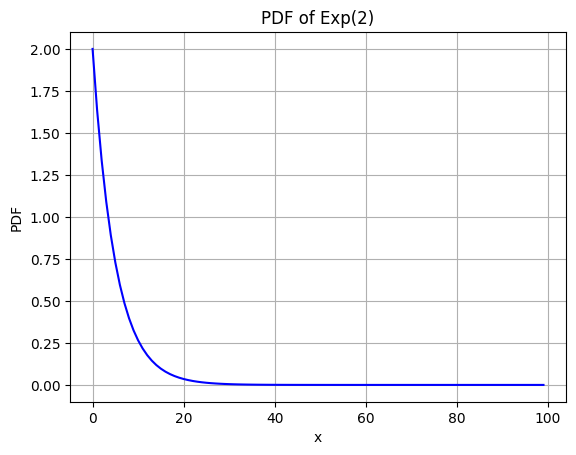

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

#Function to calculate the probability mass under exp(2) for a given interval
def expon_measure(start,end):
# lambda = 2
  l = 2
  #Calculating probability mass using the cdf
  probability_mass = expon.cdf(end, scale=1/l) - expon.cdf(start, scale=1/l)

  return probability_mass

#Testing the expon_measure function for various intervals
int1 = Interval(0,1)
int2 = Interval(1,1)
int3 = Interval(1,10)
int4 = Interval(0, float('inf'))
intervals = [[int1.start,int1.end],[int2.start,int2.end] , [int3.start,int3.end] , [int4.start,int4.end]]
for i,j in (intervals):
  probability_mass = expon_measure(i,j)
  print(f"Probability mass for interval ({i}, {j}): {probability_mass:.4f}")


#Plot the pdf of exp(2)
x= np.linspace(0,10,100)
pdf = expon.pdf(x, scale=1/2)

#Creating the plot
plt.plot(pdf, 'b-' )
plt.xlabel("x")
plt.ylabel("PDF")
plt.title("PDF of Exp(2)")
plt.grid(True)

plt.show

# #Calculation and displaying the probability mass for each interval


Using the pdf method of scipy.stats.expon, define a function called expon_pdf which will
take one argument x and return the pdf of the probability measure Exp (2) evaluated at x. Import
the integration routine quad from scipy.integrate, and read the documentation https://docs.scipy.
org/doc/scipy/reference/generated/scipy.integrate.quad.html to see how it works. Use quad to
compute and print the following integrals
(a) R 1
0
expon_pdf(x) dx
(b) R 1
1
expon_pdf(x) dx
(c) R 10
1
expon_pdf(x) dx
(d) R ∞
0
expon_pdf(x) dx
Compare your answers with those of the previous question. What do you see? Why is this the case?


In [90]:
from scipy.stats import expon
from scipy.integrate import quad
#Functiion to calculate the pdf of the probability measure exp(2) at x
def expon_pdf (x):
  return expon.pdf(x, scale = 1/2)

x= np.linspace(0,10,100)

v= expon_pdf(x)

#Testing the expon_measure function for various intervals
int1 = Interval(0,1)
int2 = Interval(1,1)
int3 = Interval(1,10)
int4 = Interval(0, float('inf'))
intervals = [[int1.start,int1.end],[int2.start,int2.end] , [int3.start,int3.end] , [int4.start,int4.end]]
for i,j in (intervals):
  quad_measure = quad(expon_pdf,i,j)
  print(np.round(quad_measure[0],4))



0.8647
0.0
0.1353
1.0


Comparing these results with the probability mass calculations from the previous question:-

1. The integral from 0 to 1 using the PDF is approximately 0.8647 while the probability mass for the same interval is also 0.8647, this is because the PDF represents the probability density within an interval

2. The integral from 1 to 1 is 0.0 because it represents the probability at a point. So the probability mass for this interval is also 0

3. The integral from 1 to 10 using the PDF is approximately 0.1353, which is the same as the probability mass for the same interval of 0.1353. This also satisfies the interpretation that the PDF represents the probability density within an interval

4. The integral from 0 to infinity using the PDF is 1.0, which means that the total area under the PDF curve is 1. This satisfies the property of probability distributions that the total probability should sum to 1

In conclusion, the results obtained using the PDF and the previous probability mass calculations are consistent and align with the properties of probability distributions